# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

import numpy as np
import pandas as pd

# Challenge 1 - Explore The Data

This lesson will explore the creation of a machine learning pipeline from beggining to end. We will save our model and use the model to make predictions on data outside of our training sample. Let's start by loading the dataset which can be obtained from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification) and [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom).

In [2]:
# Loading the data

mushrooms = pd.read_csv('../mushrooms.csv')

This dataset contains information about different types of mushrooms. Our response variable indicates whether a mushroom is poisonous. 

####  We will create a model to predict whether a mushroom is poisonous (the `class` column) using the information in all other columns.

Let's print the `head()` of this dataset to see what columns we have in our data.

In [28]:
# Your code here:
pd.set_option('display.max_columns', None)
mushrooms.head()
# mushrooms.shape[0]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### It looks like the columns in this dataset are coded. 

Let's examine the column types using `dtypes` to confirm this. 

In [6]:
# Your code here:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In this dataset, each column (feature) of the mushroom is represented by a single-character code. It would be best if we can obtain a dictionary of these codes so that we know what possible codes each column has and what each code represents. This dictionary can be obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom). In the table below, we print the code dictionary for you to reference.

| Features | Codes |
|---|---|
| classes | edible=e, poisonous=p |
| cap-shape | bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s |
| cap-surface | fibrous=f,grooves=g,scaly=y,smooth=s |
| cap-color | brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y |
| bruises | bruises=t,no=f |
| odor | almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s |
| gill-attachment | attached=a,descending=d,free=f,notched=n |
| gill-spacing | close=c,crowded=w,distant=d |
| gill-size | broad=b,narrow=n |
| gill-color | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y |
| stalk-shape | enlarging=e,tapering=t |
| stalk-root | bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? |
| stalk-surface-above-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-surface-below-ring | fibrous=f,scaly=y,silky=k,smooth=s |
| stalk-color-above-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| stalk-color-below-ring | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y |
| veil-type | partial=p,universal=u |
| veil-color | brown=n,orange=o,white=w,yellow=y |
| ring-number | none=n,one=o,two=t |
| ring-type | cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z |
| spore-print-color | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y |
| population | abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y |
| habitat | grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [ ]:
# Your code here:


#### The next step in model generation is to ensure there is no missing data and handle any missing data if they exist.

In the next cell, check to see if there is any missing data in each column of the dataset

In [7]:
# Your code here:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Since there is no work to be done to clean up missing data, the next step is to create dummy variables. 

Most machine learning algorithms cannot work with non-numeric data, so we will need to transform our data. Use the [`get_dummies` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform the data. Make sure to remove one dummy column per variable using the `drop_first=True` option.

In [9]:
# Your code here:
mushrooms_dummy = pd.get_dummies(mushrooms, drop_first=True)
mushrooms_dummy.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Our final data exploration task is to prepare the data for modeling by splitting it to predictor, response, train and test. 

We will do this using the [`train_test_split` function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In the cell below, split the data to `X_train`, `X_test`, `y_train`, and `y_test` using this function. Select 80% of the data for the training sample and the rest for the test sample.

In [12]:
from sklearn.model_selection import train_test_split

# Your code here:
y = mushrooms["class"]
X = mushrooms_dummy.drop(columns="class_p")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Challenge 2 - Decision Tree

Determining whether a mushroom is poisonous is a classification task. There are multiple classification models we can choose from.
However, since we have determined that there are many columns that are not indepdendent, this limits our choice of model. One model we will not consider is logistic regression. Two potential choices for this modeling task are a DecisionTree Classifier and an SVM.

First, please initialize a DecisionTreeClassifier and assign the initialized model to `mushroom_dc`

In [14]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier


In the cell below, fit the model to the training data.

In [15]:
# Your code here:
mushroom_dc = DecisionTreeClassifier().fit(X_train, y_train)

#### Next, let's evaluate the model. One of the most straightforward ways to evaluate a classification model is using a confusion matrix. 

The confusion matrix shows us the true positives, false positives, false negatives and true negatives in the data. Our goal is to maximize the true positives and true negatives (the observations that are correctly classified) and minimize the false positives and false negatives.

In the cell below, we'll start by generating predictions for the test data using the `predict` function. 

In [17]:
# Your code here:
predictions = mushroom_dc.predict(X_test)
mushroom_dc.score(X_test, y_test)


1.0

Now we'll import the `confusion_matrix` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)) and compute the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) by comparing the observed data (`y_test`) and the predicted data that you found in the cell above.

In [18]:
from sklearn.metrics import confusion_matrix
# Your code here:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[826   0]
 [  0 799]]


In [24]:
y_test.value_counts()


e    826
p    799
Name: class, dtype: int64

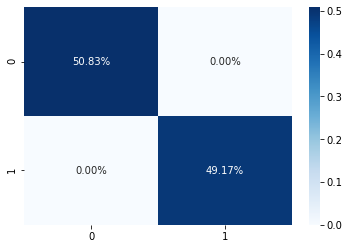

In [20]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Which are other metrics that you can use to evaluate the performance of the DecisionTree classifier? Please execute and interpret them below.

In [25]:
# Your code here:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test, predictions, pos_label='p'))
print(recall_score(y_test, predictions, pos_label='p'))
print(f1_score(y_test, predictions, pos_label='p'))


1.0
1.0
1.0


In [3]:
# Your comment here:


# Challenge 3 - Producing Individual Predictions and Saving The Model

One of the most important goals of machine learning models is to act as something like a prediction black box. We would like to pass an observation to the model and get back a prediction as an output. Let's do this in the next cells using the `predict` function. What we want to do is to pick a random mushroom and generate a prediction that will tell us whether it is poisonous.

#### In the next cell, create a function called `get_random_data` that accepts a dataset and returns a random row from the dataset.

In [34]:
from random import seed
from random import randint

def get_random_data(dataset):
    """
    Returns a random row of a dataset
    
    Args:
        dataset [dataframe]: a Pandas dataframe containing a dataset
    
    Returns:
        A random row in the dataset
    """
    random_row = randint(0, dataset.shape[0])
    # Your code here
    return pd.DataFrame(dataset.iloc[random_row]).transpose()

#### Call `get_random_data` to obtain a random row from the test dataset. Assign the returned row to `random_mushroom` and print.

In [38]:
# Your code here:
mushroom = get_random_data(X_test)

#### In the cell below, use the `predict` function to generate a prediction for this random mushroom. Is the random mushroom poisonous? Compare this to the true y value.

In [39]:
# Your code here:
mushroom_dc.predict(mushroom)

array(['e'], dtype=object)

In [40]:
y_test.loc[mushroom.index]

1749    e
Name: class, dtype: object

In [41]:
pd.DataFrame(zip(mushroom_dc.predict(mushroom),y_test.loc[mushroom.index]),columns=['predict','real'])


,predict,real
0,e,e


In [5]:
# Your comment here:


#### Our final step is to save our model. 

Do this in the cell below using [pickling](https://docs.python.org/3/library/pickle.html). Import the pickle library and save the `mushroom_rf` model as a pickle file using `pickle.dump()`. Name your file `mushrooms.sav`

In [42]:
import pickle

# Your code here:

pickle.dump(mushroom_dc, open('mushrooms.sav','wb'))
# Pickle module uses binary protocol (wb stands for write binary)


# Challenge 4 - Support Vector Machines

Please repeat all the steps on model creation and application from above using an SVM and assign the initialized model to `mushroom_svm`. Add more cells to write your code in as you need them! Next, produce a range of metrics to evaluate the performance of an SVM versus the DecisionTree classifier. Which model is giving better results here?

In [ ]:
# Your code here:


In [4]:
# Your comment here:


# Bonus Challenge: Random Forest

One of the known issues of the DecisionTrees is overfitting - a further development to mitigate this is the Random Forest Classifier. We can think of random forest as a voting algorithm. We generate many decision trees by sampling both rows and columns in our dataset. Each one of these trees produces a decision. We let all the trees "vote" and the aggregate decision that they produce gives us the final decision for our algorithm (in this case, they will vote whether each mushroom is poisonous or edible). To learn more about random forests, click [here](https://onlinecourses.science.psu.edu/stat857/node/179/).

In the cell below, we will import and initialize a random forest from scikit-learn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). Assign the initialized model to `mushroom_rf`. Then repeat all the steps on model creation and application from above.

In [43]:
# Your code here:
from sklearn.ensemble import RandomForestClassifier
mushroom_rf = RandomForestClassifier().fit(X_train, y_train)
predictions = mushroom_rf.predict(X_test)
mushroom_rf.score(X_test, y_test)


1.0